In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the dataset

blink_df = pd.read_csv('blinkit_data.csv')

In [61]:
print(blink_df.shape)
#Formatting the yeasr column
blink_df['Outlet Establishment Year'] = pd.to_datetime(blink_df['Outlet Establishment Year'], format='%Y')
blink_df.head(3)


(8523, 12)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012-01-01,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022-01-01,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010-01-01,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0


  Item Fat Content        Sales
0               LF   43857.1062
1          Low Fat  717390.8394
2          Regular  409413.1214
3          low fat   15071.7328
4              reg   15948.6810


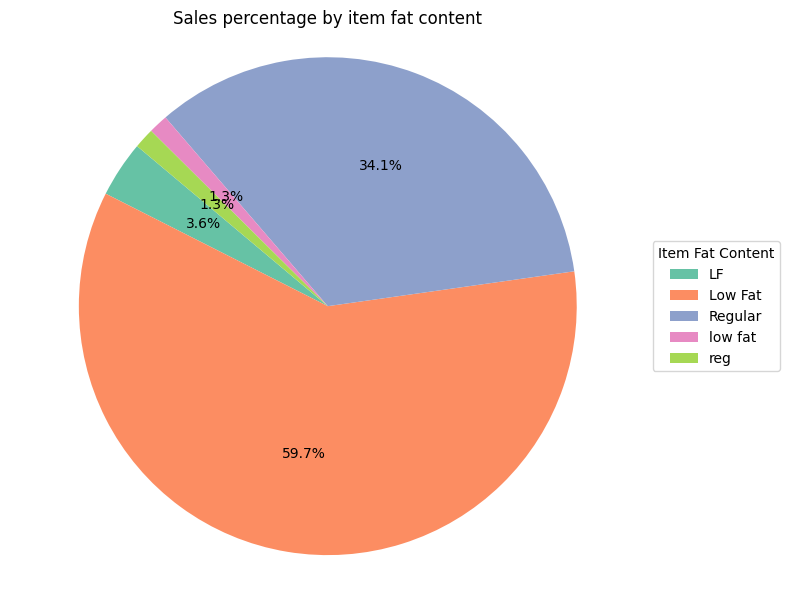

In [62]:
#Print sales sum for each Item Fat Content
fat_content_sales = blink_df.groupby('Item Fat Content')['Sales'].sum().reset_index()
print(fat_content_sales)
#Plotting the sales sum for each Item Fat Content. Pie chart
colors = sns.color_palette("Set2", n_colors=len(fat_content_sales))

# Create pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    fat_content_sales['Sales'],
    labels=None,  # Remove labels from pie slices
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)

# Add a legend on the side
plt.legend(
    patches,
    fat_content_sales['Item Fat Content'],
    title="Item Fat Content",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('Sales percentage by item fat content')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14536\4259345686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Item Type', data=item_type_sales, palette='Set2')


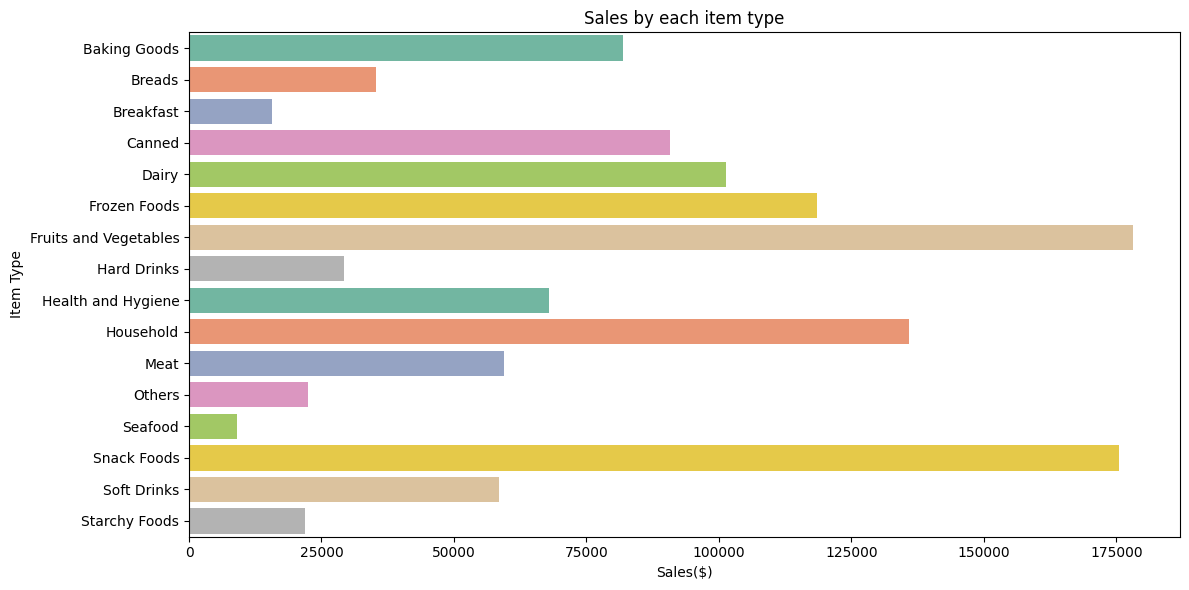

In [63]:
#Plotting the sales sum for each Item Type. Bar chart
item_type_sales = blink_df.groupby('Item Type')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Item Type', data=item_type_sales, palette='Set2') 
plt.title('Sales by each item type')
plt.xlabel('Sales($)')
plt.ylabel('Item Type')
plt.tight_layout()  
plt.show()

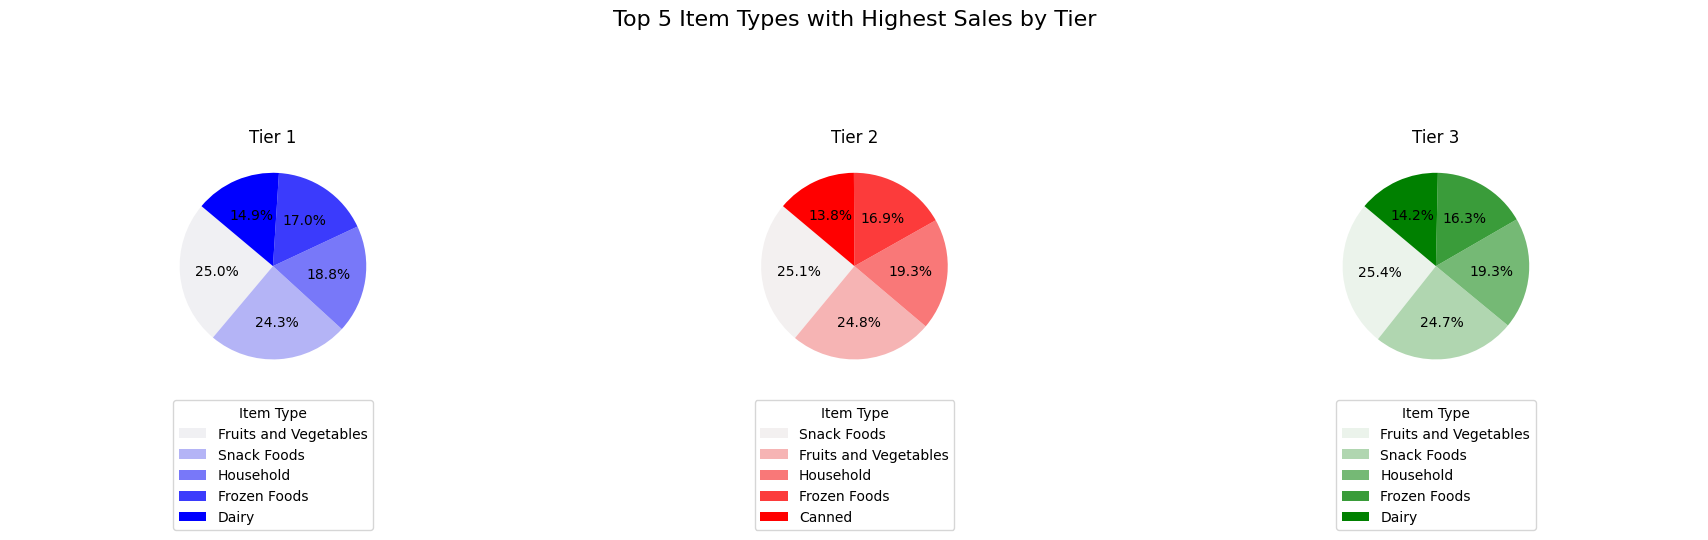

In [65]:
# Comparing Top 5 Item Types with Highest Sales by Tier

# Tier 1 data
tier_1_sales = blink_df[blink_df['Outlet Location Type'] == 'Tier 1'].groupby('Item Type')['Sales'].sum().reset_index()
tier_1_sales = tier_1_sales.sort_values(by='Sales', ascending=False).head(5)

# Tier 2 data
tier_2_sales = blink_df[blink_df['Outlet Location Type'] == 'Tier 2'].groupby('Item Type')['Sales'].sum().reset_index()
tier_2_sales = tier_2_sales.sort_values(by='Sales', ascending=False).head(5)

# Tier 3 data
tier_3_sales = blink_df[blink_df['Outlet Location Type'] == 'Tier 3'].groupby('Item Type')['Sales'].sum().reset_index()
tier_3_sales = tier_3_sales.sort_values(by='Sales', ascending=False).head(5)

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart 1 (Tier 1 - Blue)
colors1 = sns.light_palette("blue", n_colors=len(tier_1_sales))
patches1, _, _ = axs[0].pie(
    tier_1_sales['Sales'],
    labels=None,
    colors=colors1,
    autopct='%1.1f%%',
    startangle=140
)
axs[0].legend(
    patches1,
    tier_1_sales['Item Type'],
    title="Item Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05)
)
axs[0].set_title('Tier 1')

# Pie chart 2 (Tier 2 - Red)
colors2 = sns.light_palette("red", n_colors=len(tier_2_sales))
patches2, _, _ = axs[1].pie(
    tier_2_sales['Sales'],
    labels=None,
    colors=colors2,
    autopct='%1.1f%%',
    startangle=140
)
axs[1].legend(
    patches2,
    tier_2_sales['Item Type'],
    title="Item Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05)
)
axs[1].set_title('Tier 2')

# Pie chart 3 (Tier 3 - Green)
colors3 = sns.light_palette("green", n_colors=len(tier_3_sales))
patches3, _, _ = axs[2].pie(
    tier_3_sales['Sales'],
    labels=None,
    colors=colors3,
    autopct='%1.1f%%',
    startangle=140
)
axs[2].legend(
    patches3,
    tier_3_sales['Item Type'],
    title="Item Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05)
)
axs[2].set_title('Tier 3')

# Keep all pies circular
for ax in axs:
    ax.axis('equal')

plt.suptitle("Top 5 Item Types with Highest Sales by Tier", fontsize=16)
plt.tight_layout(pad=4)
plt.show()